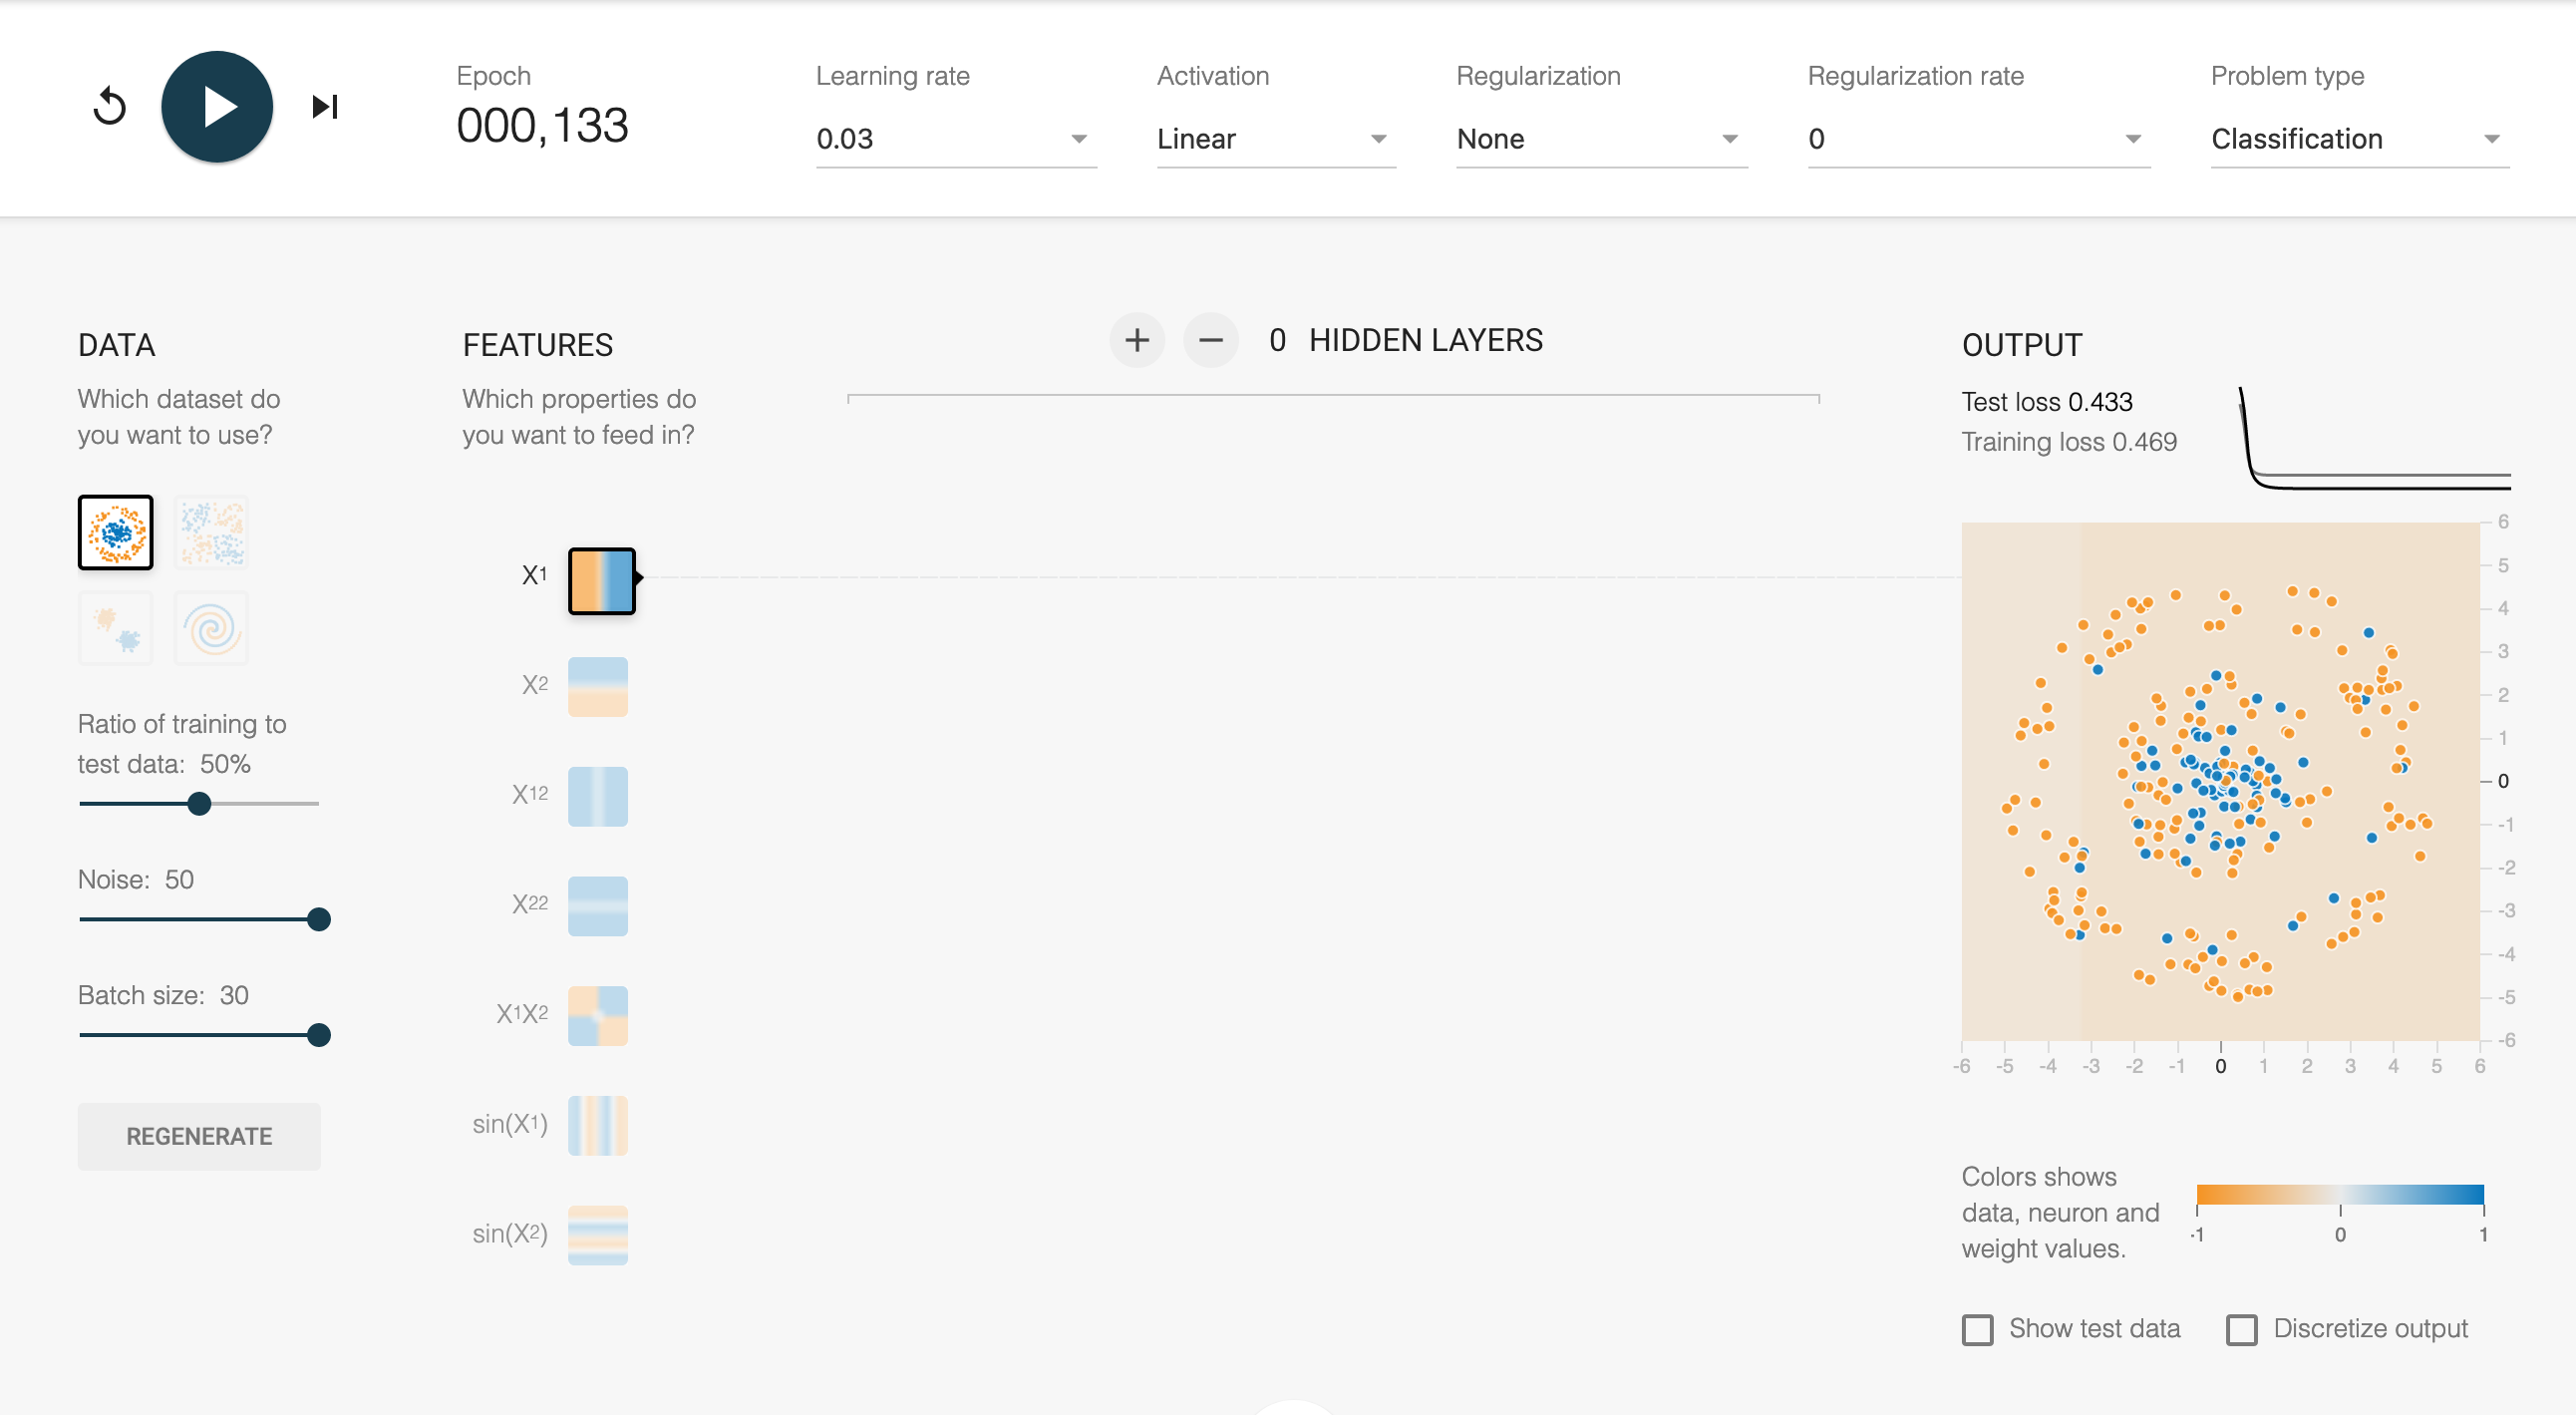

Hier is een classifier met zo'n min mogelijk aantal neuronon. Het heeft namelijk 1 laag, en dat is de input laag, met dus ook maar 1 input neuron.

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, GRU
from keras.callbacks import ModelCheckpoint
from random import randint
from keras.models import model_from_yaml


In [3]:
# Read in the data (copy cel from song-train).
corpus = open('abba.csv', 'r').read()

In [4]:
# Clean the data. (copy cell from song-train)
corpus = corpus.replace('\r', '')

In [5]:
# Create encoder and decoder dictionaries. (copy-cel from song-train)
chars = sorted(list(set(corpus)))
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}

In [7]:
# Read model from json file and load trained weights from hdf5 file.
# UITZOEKEN VIA DE TENSOFLOW SITE HOE DIT MOET.
# b.v.  https://machinelearningmastery.com/save-load-keras-deep-learning-models/
from tensorflow.keras.models import load_model

# load json and create model
model = load_model('weights-20.hdf5')


In [8]:
# Uitleg in de les

def sample(preds, temperature=1.0):
  if temperature <= 0:
    return np.argmax(preds)
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)
  return np.argmax(probas)

`if temperature <= 0: return np.argmax(preds)`: Als de temperatuur 0 of minder is, retourneert de functie gewoon de index van de grootste voorspelling.

`preds = np.asarray(preds).astype('float64')`: Dit converteert de voorspellingen naar een numpy array van float64 type.

`preds = np.log(preds) / temperature`: Dit past de logaritme toe op de voorspellingen en deelt ze door de temperatuur. Een hogere temperatuur zal leiden tot kleinere waarden na deze stap, wat betekent dat de voorspellingen dichter bij elkaar zullen liggen.

`exp_preds = np.exp(preds)`: Dit past de exponentiële functie toe op de voorspellingen, waardoor de waarden weer positief worden.

`preds = exp_preds / np.sum(exp_preds)`: Dit normaliseert de voorspellingen zodat ze optellen tot 1 en kunnen worden geïnterpreteerd als waarschijnlijkheden.

`probas = np.random.multinomial(1, preds, 1)`: Dit trekt een sample uit een multinomiale distributie op basis van de waarschijnlijkheden. Dit betekent dat het een array retourneert met dezelfde lengte als `preds`, met een 1 op de gekozen index en 0's elders.

`return np.argmax(probas)`: Dit retourneert de index van de gekozen voorspelling.

Dus, in het kort, deze functie kiest een index uit de voorspellingen, waarbij hogere waarden meer kans hebben om te worden gekozen. De temperatuur parameter bepaalt hoeveel variatie er is in de keuzes: een lage temperatuur betekent dat de hoogste voorspellingen veel meer kans hebben om te worden gekozen, terwijl een hoge temperatuur betekent dat de keuzes meer "random" zijn.

In [9]:
# Uitleg in de les

def generate(seed_pattern):
        X = np.zeros((1, sentence_length, num_chars), dtype=bool)
        for i, character in enumerate(seed_pattern):
            X[0, i, encoding[character]] = 1
        
        generated_text = ""
        for i in range(500):
            # even de temperatuur toevoegen.
            pred = model.predict(X, verbose=0)[0]
            prediction = sample(pred, 0.3)

            generated_text += decoding[prediction]

            activations = np.zeros((1, 1, num_chars), dtype=bool)
            activations[0, 0, prediction] = 1
            X = np.concatenate((X[:, 1:, :], activations), axis=1)

        return generated_text

sentence_length = 20
def make_seed(seed_phrase=""):
        if seed_phrase:
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, sentence_length):
                pattern += seed_phrase[i % phrase_length]
        else:
            seed = randint(0, corpus_length - sentence_length)
            pattern = abba_corpus[seed:seed + sentence_length]

        return pattern

`generate(seed_pattern)`: This function generates a sequence of characters based on a seed pattern. It first encodes the seed pattern into a binary matrix X of shape (1, sentence_length, num_chars). Then it generates new characters by predicting the next character based on the current pattern, and updates the pattern by removing the first character and appending the new character. This process is repeated 500 times to generate a sequence of 500 characters.

`make_seed(seed_phrase="")`: This function creates a seed pattern which is used to start off the generation of new characters in the generate function. If a seed phrase is provided, it repeats or truncates it to match the required sentence length. If no seed phrase is provided, it randomly selects a sequence from the corpus as the seed pattern.

The `generate` function uses the trained model to predict the next character. The `sample` function is used to sample a character index from the prediction probabilities. The `decoding` dictionary is used to map character indices back to characters. The `encoding` dictionary is used to map characters to their corresponding indices.

In [12]:

seed = make_seed('in the bard and show')
print(seed, end=" ")
txt =  generate(seed)
print(txt)

in the bard and show 

 and you do
I can stop I can feel so say
And I don't love to the right
Love is the man the morent
I can't lost all me
I don't stop it for me
The had have the ream and my beak a be the tood
I have to the same the same the see the show in the same the some the soround
The something with you
And I was the star in the sarice the sordy
I'm a love of the day
The fill the dream of in the sund
And I have to see
And I can be the show the see you feel to be a ball
And in the reandes you for a dide
I was a


## Sample song #1
In the bard and show you on your lovelight and i can't get the mowner i'm a marion an and every mind, there's a boot

## Sample song #1
in the bard and show i don't be a world be the song i mave the was the so the street you the the be me

## Sample song 3 
in the bard and show a stay it the fart the the me the the the all i ding you the the now the song the the the so some

# My results
#### First attempt:
in the bard and show  it so the see of the dance the way   
And I can so I could to the see   
The came the see help the some the sound on the strand   
I'm a call the strow   
And I won't love the day and start to the say   
The song to see the way to the same the way to go and the talling and the more the way   
And I can't go the may the same of the struce   
So stret the sun   
The sing when I don't can to do   
I met the dance in the purtend   
And the dark and to the some to see   
I was a criet on the some and you see   
I was a man as last sun   

#### Second attempt:
in the bard and show    
 the day the show what I can have the day   
I know the take of here a dind   
I am the sun the beas   
And the sun on the day the say   
And you world in the to the start the sound   
I can stay to be the day the sound the same I was go   
And I don't the dance in the take it all the way on the more of the soring of the strands   
And I was a call the seemes   
What I could here the sun the strow   
I was been the show I was to be me and you can the ring   
And I can be the day a dord   
And I was a done   
I was a bane and seet    

#### Third attempt:
in the bard and show   
 the day the show what I can have the day   
I know the take of here a dind   
I am the sun the beas   
And the sun on the day the say   
And you world in the to the start the sound   
I can stay to be the day the sound the same I was go   
And I don't the dance in the take it all the way on the more of the soring of the strands   
And I was a call the seemes   
What I could here the sun the strow   
I was been the show I was to be me and you can the ring   
And I can be the day a dord   
And I was a done   
I was a bane and seet    